In [4]:
%cd RethinkFL

d:\doan\RethinkFL


In [6]:
%run "analysis.py"

**************************************************************
Scenario: fl_digits Domain: inter Augmentation: weak
    method paragroup    MEAN
0   fedavg     para1  51.242
1  fedprox     para1  50.763
2      fpl     para1  53.551
3     moon     para1  51.640
**************************************************************
Scenario: fl_officecaltech Domain: inter Augmentation: weak
    method paragroup    MEAN
0   fedavg     para1  47.444
1  fedprox     para1  45.515
2      fpl     para1  50.810
3     moon     para1  45.699


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới các tệp CSV
print('*******************Digits*******************')
file_paths = ['RethinkFL/data/fl_digits/fedavg/para1/all_acc.csv', 
              'RethinkFL/data/fl_digits/fedprox/para1/all_acc.csv', 
              'RethinkFL/data/fl_digits/fpl/para1/all_acc.csv', 
              'RethinkFL/data/fl_digits/moon/para1/all_acc.csv']

# Tên phương pháp tương ứng với từng tệp CSV
methods = ['FedAvg', 'FedProx', 'FPL', 'MOON']

# Tạo một danh sách để lưu trữ dữ liệu
data_list = []

# Đọc dữ liệu từ các tệp CSV và lấy giá trị từ các cột MNIST, USPS, SVHN, SYN
for method, file_path in zip(methods, file_paths):
    data = pd.read_csv(file_path)

    # Lấy giá trị từ cột epoch_49
    data_epoch = data['epoch_49'].values
    data_epoch_avg = data['epoch_49'].mean()
    data_epoch = np.append(data_epoch, data_epoch_avg)

    # Lưu dữ liệu vào danh sách data_list
    data_list.append(data_epoch)

#in data_list vào cột dạng method x digits là MNIST, USPS, SVHN, SYN
data = pd.DataFrame(data_list, columns=['MNIST', 'USPS', 'SVHN', 'SYN','AVG'], index=methods)
print(data)

print()
print('******************Office Caltech****************')
file_paths = ['RethinkFL/data/fl_officecaltech/fedavg/para1/all_acc.csv', 
              'RethinkFL/data/fl_officecaltech/fedprox/para1/all_acc.csv', 
              'RethinkFL/data/fl_officecaltech/fpl/para1/all_acc.csv', 
              'RethinkFL/data/fl_officecaltech/moon/para1/all_acc.csv']


data_list = []

for method, file_path in zip(methods, file_paths):
    data = pd.read_csv(file_path)
    # Lấy giá trị từ cột epoch_49
    data_epoch = data['epoch_49'].values
    data_epoch_avg = data['epoch_49'].mean()
    data_epoch = np.append(data_epoch, data_epoch_avg)

    # Lưu dữ liệu vào danh sách data_list
    data_list.append(data_epoch)

data = pd.DataFrame(data_list, columns=['Caltech', 'Amazon', 'Webcam', 'DSLR', 'AVG'], index=methods)
print(data)




*******************Digits*******************
         MNIST   USPS   SVHN    SYN      AVG
FedAvg   96.96  87.59  10.29  31.00  56.4600
FedProx  97.03  86.95   9.15  27.50  55.1575
FPL      97.44  86.70   9.45  37.25  57.7100
MOON     96.89  83.36   8.83  28.42  54.3750

******************Office Caltech****************
         Caltech  Amazon  Webcam   DSLR      AVG
FedAvg     58.04   71.05   44.83  33.33  51.8125
FedProx    57.14   73.68   34.48  30.00  48.8250
FPL        60.27   81.05   43.10  43.33  56.9375
MOON       58.93   68.42   44.83  43.33  53.8775


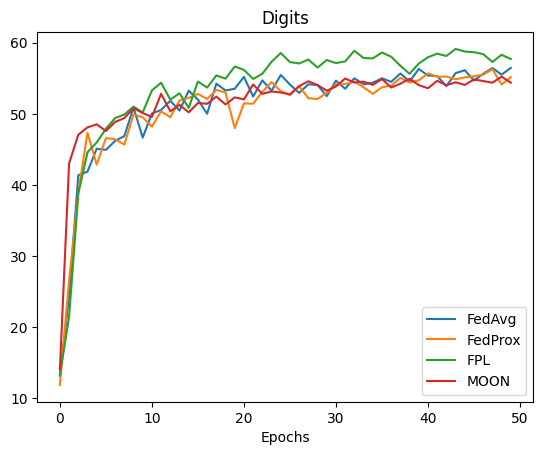

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới các tệp CSV
fedavg_path = 'RethinkFL/data/fl_digits/fedavg/para1/mean_acc.csv'
fedprox_path = 'RethinkFL/data/fl_digits/fedprox/para1/mean_acc.csv'
fpl_path = 'RethinkFL/data/fl_digits/fpl/para1/mean_acc.csv'
moon_path = 'RethinkFL/data/fl_digits/moon/para1/mean_acc.csv'

#plot biểu đồ đường với 4 đường là data từ csv

fedavg = pd.read_csv(fedavg_path)
fedprox = pd.read_csv(fedprox_path)
fpl = pd.read_csv(fpl_path)
moon = pd.read_csv(moon_path)
# # gán hàng 1 là epoch, hàng 2 là mean_acc
fedavg = fedavg.T
fedprox = fedprox.T
fpl = fpl.T
moon = moon.T

fedavg = fedavg.reset_index()
fedprox = fedprox.reset_index()
fpl = fpl.reset_index()
moon = moon.reset_index()

fedavg = fedavg.rename(columns={'index': 'Epochs'})
fedprox = fedprox.rename(columns={'index': 'Epochs'})
fpl = fpl.rename(columns={'index': 'Epochs'})
moon = moon.rename(columns={'index': 'Epochs'})

fedavg = fedavg.drop(columns=['Epochs'])
fedprox = fedprox.drop(columns=['Epochs'])
fpl = fpl.drop(columns=['Epochs'])
moon = moon.drop(columns=['Epochs'])


#plot biểu đồ đường của fedavg
plt.plot(fedavg, label='FedAvg')
plt.plot(fedprox, label='FedProx')
plt.plot(fpl, label='FPL')
plt.plot(moon, label='MOON')
plt.xlabel('Epochs')
plt.title('Digits')
plt.legend()
plt.show()






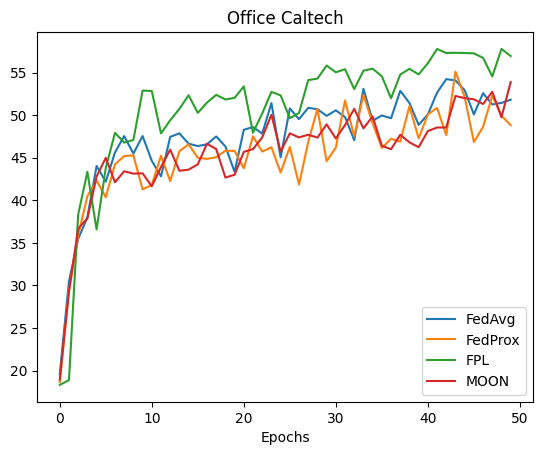

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Đường dẫn tới các tệp CSV
fedavg_path = 'RethinkFL/data/fl_officecaltech/fedavg/para1/mean_acc.csv'
fedprox_path = 'RethinkFL/data/fl_officecaltech/fedprox/para1/mean_acc.csv'
fpl_path = 'RethinkFL/data/fl_officecaltech/fpl/para1/mean_acc.csv'
moon_path = 'RethinkFL/data/fl_officecaltech/moon/para1/mean_acc.csv'
#plot biểu đồ đường với 4 đường là data từ csv

fedavg = pd.read_csv(fedavg_path)
fedprox = pd.read_csv(fedprox_path)
fpl = pd.read_csv(fpl_path)
moon = pd.read_csv(moon_path)
# # gán hàng 1 là epoch, hàng 2 là mean_acc
fedavg = fedavg.T
fedprox = fedprox.T
fpl = fpl.T
moon = moon.T

fedavg = fedavg.reset_index()
fedprox = fedprox.reset_index()
fpl = fpl.reset_index()
moon = moon.reset_index()

fedavg = fedavg.rename(columns={'index': 'Epochs'})
fedprox = fedprox.rename(columns={'index': 'Epochs'})
fpl = fpl.rename(columns={'index': 'Epochs'})
moon = moon.rename(columns={'index': 'Epochs'})

fedavg = fedavg.drop(columns=['Epochs'])
fedprox = fedprox.drop(columns=['Epochs'])
fpl = fpl.drop(columns=['Epochs'])
moon = moon.drop(columns=['Epochs'])


#plot biểu đồ đường của fedavg
plt.plot(fedavg, label='FedAvg')
plt.plot(fedprox, label='FedProx')
plt.plot(fpl, label='FPL')
plt.plot(moon, label='MOON')
plt.xlabel('Epochs')
plt.title('Office Caltech')
plt.legend()
plt.show()